<H3>Hello, I will be using code comments instead of markdown cells</H3>
<h4>have a nice day!</h4>

In [1]:
# import needed libs
import sys
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import math

In [2]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.18.1-py_0 conda-forge

geographiclib- 100% |################################| Time: 0:00:00  23.71 MB/s
geopy-1.18.1-p 100% |################################| Time: 0:00:00  35.99 MB/s
Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py35_1 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge

altair-2.2.2-p 100% |################################| Time: 0:00:00  55.37 MB/s
branca-0.3.1-p 100% |################################| Time: 0:00:00  37.87 MB/s
vincent-0.4.4- 100% |###################

In [3]:
#Define Foursquare Credentials and Version and limit
CLIENT_ID = 'DY0YEQZ1Z4JHB3E2ODKZTJ31GLJ4LHWXNB5FHFDNZZ13ZH0R' # your Foursquare ID
CLIENT_SECRET = 'WBMCEP1BGLEGBHR2DZAKJZBOS5CBRL4UFOLDWAPEFKNOE23Y' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 10000

In [4]:
#NY centre coordinates
ny_lat=40.730610
ny_lng=-73.935242

#lets define radius of search
area=1213.37

#lets find radius in metres
radius = math.sqrt(area/3.14)*1000

#lets define search queries
search_query = 'Veterinarian'

print('Coordinates of the search area centre are: ', ny_lat, ny_lng, ', search radius: ', radius , 'meters')

Coordinates of the search area centre are:  40.73061 -73.935242 , search radius:  19657.659242111735 meters


In [5]:
#define search URL
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, ny_lat, ny_lng, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=DY0YEQZ1Z4JHB3E2ODKZTJ31GLJ4LHWXNB5FHFDNZZ13ZH0R&client_secret=WBMCEP1BGLEGBHR2DZAKJZBOS5CBRL4UFOLDWAPEFKNOE23Y&ll=40.73061,-73.935242&v=20180604&query=Veterinarian&radius=19657.659242111735&limit=10000'

In [6]:
#results in JSON format
results = requests.get(url).json()

In [7]:
#lets look at search results in JSON format
results

{'meta': {'code': 200, 'requestId': '5c6d16d5351e3d13a96d35c8'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_veterinarian_',
       'suffix': '.png'},
      'id': '4d954af4a243a5684765b473',
      'name': 'Veterinarian',
      'pluralName': 'Veterinarians',
      'primary': True,
      'shortName': 'Veterinarians'}],
    'hasPerk': False,
    'id': '4b91517df964a520b3b233e3',
    'location': {'address': '32-41 Steinway St #R',
     'cc': 'US',
     'city': 'Astoria',
     'country': 'United States',
     'distance': 3300,
     'formattedAddress': ['32-41 Steinway St #R',
      'Astoria, NY 11103',
      'United States'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.75782592499892,
       'lng': -73.91970744124593}],
     'lat': 40.75782592499892,
     'lng': -73.91970744124593,
     'postalCode': '11103',
     'state': 'NY'},
    'name': 'Steinway Veterinarian',
    'referralId': 'v-1550653141'},

In [8]:
# assign relevant part of JSON to italian venues
venues = results['response']['venues']

# tranform venues into a dataframe
venues = json_normalize(venues)

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in venues.columns if col.startswith('location.')] + ['id']
venues_filter = venues.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
venues_filter['categories'] = venues_filter.apply(get_category_type, axis=1)

# clean column names by keeping only last term
venues_filter.columns = [column.split('.')[-1] for column in venues_filter.columns]

#lets see what we got here
print('DF shape: ', venues_filter.shape)
venues_filter

DF shape:  (23, 15)


,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Steinway Veterinarian,Veterinarian,32-41 Steinway St #R,US,Astoria,United States,NaN,3300,"[32-41 Steinway St #R, Astoria, NY 11103, Unit...","[{'lng': -73.91970744124593, 'lat': 40.7578259...",40.757826,-73.919707,11103,NY,4b91517df964a520b3b233e3
1,A Veterinarian,Veterinarian,NaN,US,Middle Village,United States,NaN,5526,"[Middle Village, NY 11379, United States]","[{'lng': -73.87394851383898, 'lat': 40.7130894...",40.713089,-73.873949,11379,NY,4cb86d6ea33bb1f713eb80fd
2,The Village Veterinarian,Veterinarian,340 E 11th St,US,New York,United States,btwn 1st & 2nd Ave,4158,"[340 E 11th St (btwn 1st & 2nd Ave), New York,...","[{'lng': -73.9845220240651, 'lat': 40.72961372...",40.729614,-73.984522,10003,NY,4c3c83e04bc9a5932fbcd271
3,steinway court veterinarian steinway court vet...,Pet Service,42-06 Steinway Street,US,Astoria,United States,NaN,3286,"[42-06 Steinway Street, Astoria, NY, United St...","[{'lng': -73.91963522518799, 'lat': 40.7576572...",40.757657,-73.919635,NaN,NY,55043316498e6198e7f41f46
4,"Dr. Pet Daddy Veterinarian, PC",Pet Store,27-15 24th Ave,US,Astoria,United States,NaN,5022,"[27-15 24th Ave, Astoria, NY 11102, United Sta...","[{'lng': -73.91728041463668, 'lat': 40.7736239...",40.773624,-73.917280,11102,NY,56324b4d498eb5f26f97403d
5,Dr. Cindy Bressler House Call Veterinarian NYC...,Veterinarian,170 East 66th Street,US,New York,United States,3rd ave and Lexington Ave,4446,[170 East 66th Street (3rd ave and Lexington A...,"[{'lng': -73.96614074707031, 'lat': 40.7629749...",40.762975,-73.966141,10065,NY,54e1f61c498eee7bd0893ee5
6,City Veterinarian,Veterinarian,220 West ZEnd,US,New York,United States,Broadway,6707,"[220 West ZEnd (Broadway), New York, NY 10023,...","[{'lng': -73.98263275921593, 'lat': 40.7790004...",40.779000,-73.982633,10023,NY,4b8abb03f964a520107d32e3
7,VetPronto - Mobile Veterinarians,Veterinarian,1461 1st Ave,US,New York,United States,NaN,4744,"[1461 1st Ave, New York, NY 10075, United States]","[{'lng': -73.9543049, 'lat': 40.77070601, 'lab...",40.770706,-73.954305,10075,NY,5ab6c4ac9411f2343fa8168f
8,Lenox Hill Veterinarians,Veterinarian,204 E 76th St,US,New York,United States,NaN,5000,"[204 E 76th St, New York, NY 10021, United Sta...","[{'lng': -73.958382, 'lat': 40.771973, 'label'...",40.771973,-73.958382,10021,NY,4bc08ba9920eb713e10b192c
9,Bayside Veterinarian,Veterinarian,Bell Blvd,US,Bayside,United States,NaN,13939,"[Bell Blvd, Bayside, NY 11361, United States]","[{'lng': -73.77725200326664, 'lat': 40.7674132...",40.767413,-73.777252,11361,NY,4ff0bd10e4b0581584aa40b2


In [9]:
#lets see what areas are in the data frame
venues_filter.city.unique()

array(['Astoria', 'Middle Village', 'New York', 'Bayside', 'Jamaica',
       'Brooklyn', 'Jersey City', 'Bronx', 'Montclair', 'Staten Island',
       'New Hyde Park'], dtype=object)

city
Astoria           3
Bayside           2
Bronx             1
Brooklyn          4
Jamaica           1
Jersey City       1
Middle Village    1
Montclair         1
New Hyde Park     1
New York          7
Staten Island     1
Name: name, dtype: int64


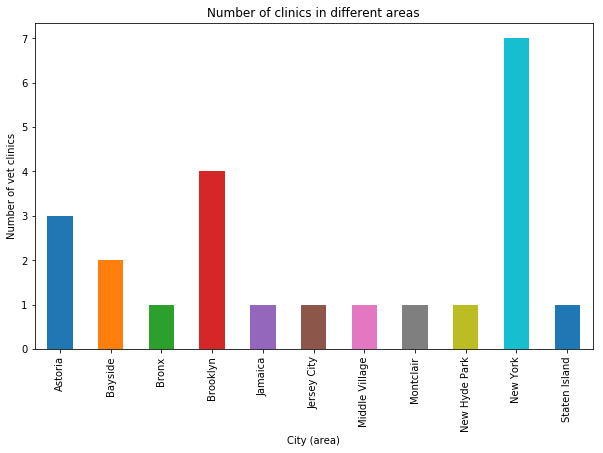

In [45]:
#lets visualize number of clinics in different areas
df_areas = venues_filter.groupby('city')['name'].nunique()
print(df_areas)

%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt


df_areas.plot(kind='bar', figsize=(10, 6))

plt.xlabel('City (area)')
plt.ylabel('Number of vet clinics')
plt.title('Number of clinics in different areas')

plt.show()

In [47]:
#we can see that in our list there are some wrong venues (for example "Port Veterinarian Airport Terminal") - we need to get rid of them!
venues_filter = venues_filter.drop(venues_filter[venues_filter.categories !='Veterinarian'].index)

#lets also drop venues from the outside of New York State
venues_filter = venues_filter.drop(venues_filter[venues_filter.state !='NY'].index)

#now lets get rid of clinics which do not belong to New York City - knowing the fact that there are only Bronx, Brooklyn, Manhattan, New York, Queens and Staten Island are the right cities for NYC.
venues_filter = venues_filter.loc[(venues_filter['city']=='Bronx')|(venues_filter['city']=='Brooklyn')|(venues_filter['city']=='Manhattan')|(venues_filter['city']=='New York')|(venues_filter['city']=='Queens')|(venues_filter['city']=='Staten Island')]

#lets see the "clean" result
venues_filter

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
2,The Village Veterinarian,Veterinarian,340 E 11th St,US,New York,United States,btwn 1st & 2nd Ave,4158,"[340 E 11th St (btwn 1st & 2nd Ave), New York,...","[{'lng': -73.9845220240651, 'lat': 40.72961372...",40.729614,-73.984522,10003,NY,4c3c83e04bc9a5932fbcd271
5,Dr. Cindy Bressler House Call Veterinarian NYC...,Veterinarian,170 East 66th Street,US,New York,United States,3rd ave and Lexington Ave,4446,[170 East 66th Street (3rd ave and Lexington A...,"[{'lng': -73.96614074707031, 'lat': 40.7629749...",40.762975,-73.966141,10065,NY,54e1f61c498eee7bd0893ee5
6,City Veterinarian,Veterinarian,220 West ZEnd,US,New York,United States,Broadway,6707,"[220 West ZEnd (Broadway), New York, NY 10023,...","[{'lng': -73.98263275921593, 'lat': 40.7790004...",40.779000,-73.982633,10023,NY,4b8abb03f964a520107d32e3
7,VetPronto - Mobile Veterinarians,Veterinarian,1461 1st Ave,US,New York,United States,NaN,4744,"[1461 1st Ave, New York, NY 10075, United States]","[{'lng': -73.9543049, 'lat': 40.77070601, 'lab...",40.770706,-73.954305,10075,NY,5ab6c4ac9411f2343fa8168f
8,Lenox Hill Veterinarians,Veterinarian,204 E 76th St,US,New York,United States,NaN,5000,"[204 E 76th St, New York, NY 10021, United Sta...","[{'lng': -73.958382, 'lat': 40.771973, 'label'...",40.771973,-73.958382,10021,NY,4bc08ba9920eb713e10b192c
10,Symphony Vet Center,Veterinarian,170 W 96th St,US,New York,United States,Amsterdam,7621,"[170 W 96th St (Amsterdam), New York, NY 10025...","[{'lng': -73.96991198344747, 'lat': 40.7938439...",40.793844,-73.969912,10025,NY,4e2af41da809f1b1640a346b
12,Park Slope Veterinary Center,Veterinarian,639 4th Ave,US,Brooklyn,United States,19th,8960,"[639 4th Ave (19th), Brooklyn, NY 11232, Unite...","[{'lng': -73.9944164320893, 'lat': 40.66377523...",40.663775,-73.994416,11232,NY,4d948000af67370459027d09
13,MVA Veterinarian,Veterinarian,NaN,US,Brooklyn,United States,NaN,15466,"[Brooklyn, NY 11223, United States]","[{'lng': -73.97725509387166, 'lat': 40.5953765...",40.595377,-73.977255,11223,NY,50c360bbe4b0e0fa34731cf9
14,Carnegie Hill Veterinarians,Veterinarian,1707 3rd Ave,US,New York,United States,E96th,6161,"[1707 3rd Ave (E96th), New York, NY 10128, Uni...","[{'lng': -73.94932555041507, 'lat': 40.7849210...",40.784921,-73.949326,10128,NY,53c54703498efa2cc64107e7
15,Call Ahead Vet,Veterinarian,654 5th Ave,US,Brooklyn,United States,19th and 20th Street,8988,"[654 5th Ave (19th and 20th Street), Brooklyn,...","[{'lng': -73.99244072805992, 'lat': 40.6625012...",40.662501,-73.992441,11215,NY,4ea88fe46c253859bb057061


city
Bronx            1
Brooklyn         4
New York         7
Staten Island    1
Name: name, dtype: int64


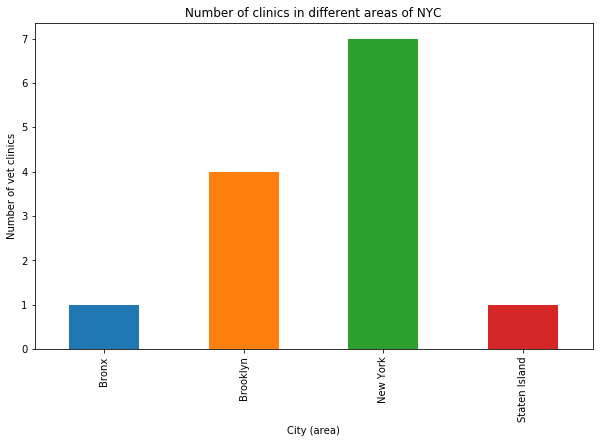

In [49]:
#lets visualize number of clinics in different areas from cleaned data frame
df_areas = venues_filter.groupby('city')['name'].nunique()
print(df_areas)

%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt


df_areas.plot(kind='bar', figsize=(10, 6))

plt.xlabel('City (area)')
plt.ylabel('Number of vet clinics')
plt.title('Number of clinics in different areas of NYC')

plt.show()

In [140]:
#lets group and fetch only the necessary info
venues_filter= venues_filter[['name','categories','address','city','lat','lng','id']]

#reset indexes
venues_filter = venues_filter.reset_index(drop=True)

#show result
venues_filter

,name,categories,address,city,lat,lng,id
0,The Village Veterinarian,Veterinarian,340 E 11th St,New York,40.729614,-73.984522,4c3c83e04bc9a5932fbcd271
1,Dr. Cindy Bressler House Call Veterinarian NYC...,Veterinarian,170 East 66th Street,New York,40.762975,-73.966141,54e1f61c498eee7bd0893ee5
2,City Veterinarian,Veterinarian,220 West ZEnd,New York,40.779000,-73.982633,4b8abb03f964a520107d32e3
3,Symphony Vet Center,Veterinarian,170 W 96th St,New York,40.793844,-73.969912,4e2af41da809f1b1640a346b
4,Park Slope Veterinary Center,Veterinarian,639 4th Ave,Brooklyn,40.663775,-73.994416,4d948000af67370459027d09
5,Lenox Hill Veterinarians,Veterinarian,204 E 76th St,New York,40.771973,-73.958382,4bc08ba9920eb713e10b192c
6,VetPronto - Mobile Veterinarians,Veterinarian,1461 1st Ave,New York,40.770706,-73.954305,5ab6c4ac9411f2343fa8168f
7,MVA Veterinarian,Veterinarian,NaN,Brooklyn,40.595377,-73.977255,50c360bbe4b0e0fa34731cf9
8,Carnegie Hill Veterinarians,Veterinarian,1707 3rd Ave,New York,40.784921,-73.949326,53c54703498efa2cc64107e7
9,Call Ahead Vet,Veterinarian,654 5th Ave,Brooklyn,40.662501,-73.992441,4ea88fe46c253859bb057061


<h2>So, now I have all the neccessary info for my research!</h2>

<h2>Part 2</h2>

In [55]:
# generate map centered around the search area centre
venues_map = folium.Map(location=[ny_lat,ny_lng], zoom_start=5) 

# add a red circle marker to represent the search area centre
folium.features.CircleMarker(
    [ny_lat, ny_lng],
    radius=3,
    color='black',
    popup='Centre of NYC',
    fill = True,
    fill_color = 'red',
    fill_opacity = 1
).add_to(venues_map)

# add the police venues as blue circle markers
for lat, lng, label in zip(venues_filter.lat, venues_filter.lng, venues_filter.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=3,
        color='red',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=1
    ).add_to(venues_map)

# display map
venues_map